#### 1.4.10 Histograms in OpenCV

In [4]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('mount.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [6]:
hist.shape

(256, 1)

In [7]:
print(hist)

[[  861.]
 [  217.]
 [  267.]
 [  320.]
 [  293.]
 [  382.]
 [  457.]
 [  550.]
 [  654.]
 [  790.]
 [  885.]
 [  964.]
 [  983.]
 [ 1082.]
 [ 1093.]
 [ 1018.]
 [  997.]
 [  934.]
 [  981.]
 [  958.]
 [  897.]
 [  883.]
 [  887.]
 [  893.]
 [  997.]
 [  887.]
 [  910.]
 [  896.]
 [  911.]
 [  878.]
 [  907.]
 [  945.]
 [  917.]
 [  992.]
 [ 1074.]
 [ 1260.]
 [ 1374.]
 [ 1619.]
 [ 1696.]
 [ 1754.]
 [ 1615.]
 [ 1333.]
 [ 1290.]
 [ 1258.]
 [ 1213.]
 [ 1169.]
 [ 1160.]
 [ 1152.]
 [ 1199.]
 [ 1199.]
 [ 1235.]
 [ 1232.]
 [ 1359.]
 [ 1266.]
 [ 1269.]
 [ 1300.]
 [ 1308.]
 [ 1280.]
 [ 1232.]
 [ 1217.]
 [ 1223.]
 [ 1224.]
 [ 1224.]
 [ 1248.]
 [ 1200.]
 [ 1230.]
 [ 1314.]
 [ 1275.]
 [ 1313.]
 [ 1375.]
 [ 1418.]
 [ 1441.]
 [ 1428.]
 [ 1404.]
 [ 1428.]
 [ 1547.]
 [ 1538.]
 [ 1648.]
 [ 1674.]
 [ 1713.]
 [ 1702.]
 [ 1734.]
 [ 1715.]
 [ 1815.]
 [ 1768.]
 [ 1770.]
 [ 1685.]
 [ 1705.]
 [ 1669.]
 [ 1656.]
 [ 1801.]
 [ 1904.]
 [ 1934.]
 [ 1993.]
 [ 2128.]
 [ 2118.]
 [ 2286.]
 [ 2348.]
 [ 2431.]
 [ 2621.]


In [8]:
hist, bins = np.histogram(img.ravel(),256,[0,256])

In [9]:
print(hist)

[  861   217   267   320   293   382   457   550   654   790   885   964
   983  1082  1093  1018   997   934   981   958   897   883   887   893
   997   887   910   896   911   878   907   945   917   992  1074  1260
  1374  1619  1696  1754  1615  1333  1290  1258  1213  1169  1160  1152
  1199  1199  1235  1232  1359  1266  1269  1300  1308  1280  1232  1217
  1223  1224  1224  1248  1200  1230  1314  1275  1313  1375  1418  1441
  1428  1404  1428  1547  1538  1648  1674  1713  1702  1734  1715  1815
  1768  1770  1685  1705  1669  1656  1801  1904  1934  1993  2128  2118
  2286  2348  2431  2621  2598  2780  2873  2989  3049  2953  3039  3048
  2910  2998  2838  2880  2640  2589  2496  2351  2286  2262  2266  2153
  2173  2077  1975  1934  1939  1856  1782  1764  1698  1640  1480  1528
  1396  1408  1434  1381  1303  1400  1373  1458  1529  1559  1654  1744
  1760  1804  2158  2221  2196  2421  2600  3220  3963  4231  3968  4811
  5319  5700  5934  6994  8770  7506  7979  9644 10

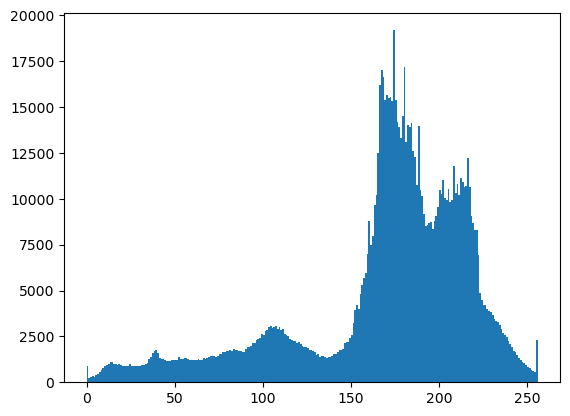

In [10]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

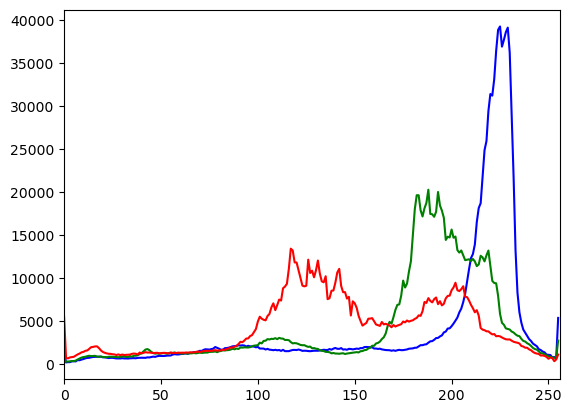

In [11]:
img = cv2.imread('mount.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [16]:
img = cv2.imread('mount.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:750, 100:1180] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

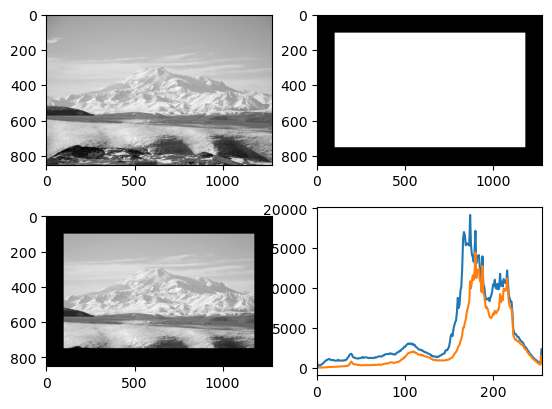

In [17]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [18]:
img = cv2.imread('mount.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

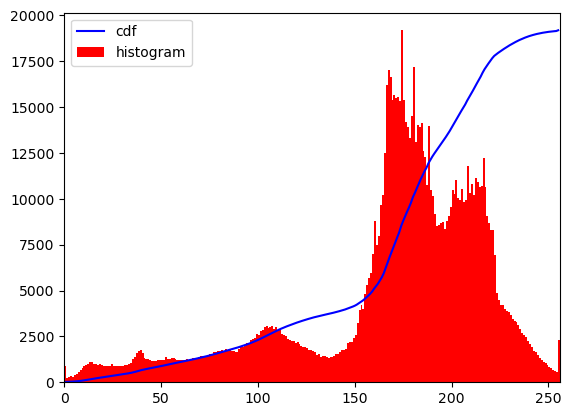

In [19]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [20]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [21]:
img2 = cdf[img]

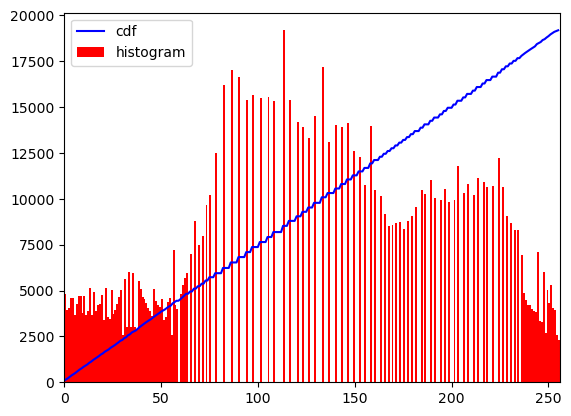

In [22]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

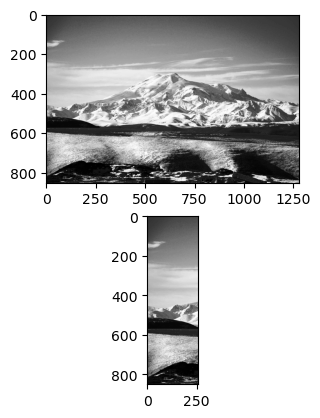

In [23]:
plt.subplot(211), plt.imshow(img2, 'gray')
plt.subplot(212), plt.imshow(img2,'gray')

plt.xlim([0,256])
plt.show()

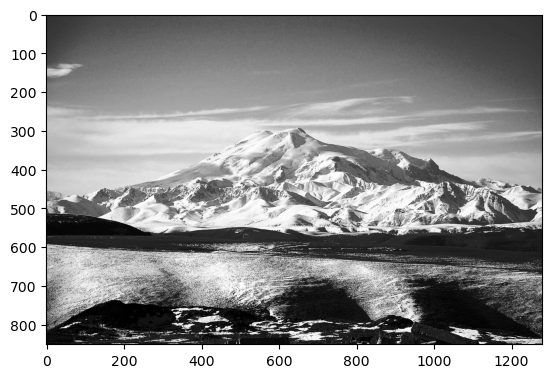

In [24]:
plt.imshow(img2,'gray')
plt.show()